In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 39.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 62.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 80.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 30.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB

In [3]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, FlairEmbeddings, FastTextEmbeddings
from typing import List

In [4]:
# French corpus of 127 texts from ECHR (automatic and official translations) with projected annotations (reviewed and non-reviewed)

columns = {0:'text', 1:'ner'}

corpus_folder = '/content/drive/MyDrive/.../'
corpus : Corpus = ColumnCorpus(corpus_folder, columns,
                                    train_file='FR-all.tsv', column_delimiter=' ',
                                    dev_file=None,
                                    test_file=None
)

# obtain and print corpus statistics
stats = corpus.obtain_statistics()
print(stats)

2023-09-18 12:41:01,864 Reading data from /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler
2023-09-18 12:41:01,866 Train: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/FR-reviewed-PER.tsv
2023-09-18 12:41:01,867 Dev: None
2023-09-18 12:41:01,870 Test: None
{
    "TRAIN": {
        "dataset": "TRAIN",
        "total_number_of_documents": 3902,
        "number_of_documents_per_class": {
            "CODE": 209,
            "DEM": 138,
            "PER": 767,
            "DATETIME": 1928,
            "LOC": 344,
            "MISC": 163,
            "ORG": 471,
            "QUANTITY": 105
        },
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 115333,
            "min": 1,
            "max": 508,
            "avg": 29.557406458226552
        }
    },
    "TEST": {
        "dataset": "TEST",
        "total_number_of_documents": 482,
        "number_of_documents_per_class": {
            "DATETIME": 225,
            "OR

In [5]:
# 2. what tag do we want to predict?
tag_type = 'ner'

# 3. make the tag dictionary from the corpus
new_tag_dictionary = corpus.make_label_dictionary(label_type=tag_type)
print(new_tag_dictionary.idx2item)

2023-09-18 12:41:08,720 Computing label dictionary. Progress:


3902it [00:00, 46850.05it/s]

2023-09-18 12:41:08,811 Dictionary created for label 'ner' with 9 values: DATETIME (seen 1928 times), PER (seen 767 times), ORG (seen 471 times), LOC (seen 344 times), CODE (seen 209 times), MISC (seen 163 times), DEM (seen 138 times), QUANTITY (seen 105 times)
[b'<unk>', b'DATETIME', b'PER', b'ORG', b'LOC', b'CODE', b'MISC', b'DEM', b'QUANTITY']


In [6]:
# initialize sequence tagger
from flair.models import SequenceTagger

tagger = SequenceTagger.load("flair/ner-french")

2023-09-18 12:41:25,575 SequenceTagger predicts: Dictionary with 19 tags: O, S-LOC, B-LOC, E-LOC, I-LOC, S-PER, B-PER, E-PER, I-PER, S-MISC, B-MISC, E-MISC, I-MISC, S-ORG, B-ORG, E-ORG, I-ORG, <START>, <STOP>


In [7]:
print(tagger.label_dictionary.idx2item)

[b'O', b'S-LOC', b'B-LOC', b'E-LOC', b'I-LOC', b'S-PER', b'B-PER', b'E-PER', b'I-PER', b'S-MISC', b'B-MISC', b'E-MISC', b'I-MISC', b'S-ORG', b'B-ORG', b'E-ORG', b'I-ORG', b'<START>', b'<STOP>']


In [8]:
new_tagger = SequenceTagger(tagger.embeddings, new_tag_dictionary, tag_type=tag_type)

2023-09-18 12:41:32,352 SequenceTagger predicts: Dictionary with 33 tags: O, S-DATETIME, B-DATETIME, E-DATETIME, I-DATETIME, S-PER, B-PER, E-PER, I-PER, S-ORG, B-ORG, E-ORG, I-ORG, S-LOC, B-LOC, E-LOC, I-LOC, S-CODE, B-CODE, E-CODE, I-CODE, S-MISC, B-MISC, E-MISC, I-MISC, S-DEM, B-DEM, E-DEM, I-DEM, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY


In [9]:
# initialize trainer
from flair.trainers import ModelTrainer
trainer = ModelTrainer(new_tagger, corpus)

In [10]:
# train # train_with_dev=True
trainer.train('/content/drive/MyDrive/...',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=14,
              write_weights=True)
# saving the model into your drive (need to provide the full path of the folder in which you want to save the model)

2023-09-18 12:41:41,213 ----------------------------------------------------------------------------------------------------
2023-09-18 12:41:41,215 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      '0-/vol/home-vol2/ml/akbikala/.flair/embeddings/fr-wiki-fasttext-300d-1M'
      (embedding): Embedding(1000000, 300)
    )
    (list_embedding_1): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(275, 100)
        (rnn): LSTM(100, 1024)
      )
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(275, 100)
        (rnn): LSTM(100, 1024)
      )
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=2348, out_features=2348, bias=True)
  (rnn): LSTM(2348, 256, batch_first=True, bidirectional=True)
  (linea

100%|██████████| 14/14 [00:04<00:00,  2.85it/s]

2023-09-18 12:42:28,314 Evaluating as a multi-label problem: False
2023-09-18 12:42:28,335 DEV : loss 0.29530271887779236 - f1-score (micro avg)  0.3828
2023-09-18 12:42:28,380 BAD EPOCHS (no improvement): 0
2023-09-18 12:42:28,384 saving best model


2023-09-18 12:42:31,754 ----------------------------------------------------------------------------------------------------
2023-09-18 12:42:33,850 epoch 2 - iter 12/122 - loss 0.23386229 - time (sec): 2.07 - samples/sec: 5395.87 - lr: 0.100000
2023-09-18 12:42:36,986 epoch 2 - iter 24/122 - loss 0.23198638 - time (sec): 5.21 - samples/sec: 4322.74 - lr: 0.100000
2023-09-18 12:42:39,595 epoch 2 - iter 36/122 - loss 0.22756655 - time (sec): 7.82 - samples/sec: 4354.94 - lr: 0.100000
2023-09-18 12:42:43,332 epoch 2 - iter 48/122 - loss 0.27654013 - time (sec): 11.55 - samples/sec: 3939.65 - lr: 0.100000
2023-09-18 12:42:45,742 epoch 2 - iter 60/122 - loss 0.26067233 - time (sec): 13.96 - samples/sec: 4086.24 - lr: 0.100000
2023-09-18 12:42:48,217 epoch 2 - iter 72/122 - loss 0.25076182 - time (sec): 16.44 - samples/sec: 4132.51 - lr: 0.100000
2023-09-18 12:42:50,687 epoch 2 - iter 84/122 - loss 0.24002734 - time (sec): 18.91 - samples/sec: 4201.40 - lr: 0.100000
2023-09-18 12:42:53,132 

100%|██████████| 14/14 [00:04<00:00,  3.37it/s]

2023-09-18 12:43:03,513 Evaluating as a multi-label problem: False
2023-09-18 12:43:03,528 DEV : loss 0.15587452054023743 - f1-score (micro avg)  0.7009


2023-09-18 12:43:03,573 BAD EPOCHS (no improvement): 0
2023-09-18 12:43:03,576 saving best model
2023-09-18 12:43:07,393 ----------------------------------------------------------------------------------------------------
2023-09-18 12:43:09,399 epoch 3 - iter 12/122 - loss 0.15154961 - time (sec): 2.00 - samples/sec: 5558.92 - lr: 0.100000
2023-09-18 12:43:12,781 epoch 3 - iter 24/122 - loss 0.16117322 - time (sec): 5.39 - samples/sec: 4267.14 - lr: 0.100000
2023-09-18 12:43:15,133 epoch 3 - iter 36/122 - loss 0.16504433 - time (sec): 7.74 - samples/sec: 4371.34 - lr: 0.100000
2023-09-18 12:43:17,472 epoch 3 - iter 48/122 - loss 0.16040080 - time (sec): 10.08 - samples/sec: 4470.59 - lr: 0.100000
2023-09-18 12:43:19,803 epoch 3 - iter 60/122 - loss 0.15431089 - time (sec): 12.41 - samples/sec: 4555.02 - lr: 0.100000
2023-09-18 12:43:22,209 epoch 3 - iter 72/122 - loss 0.14948831 - time (sec): 14.81 - samples/sec: 4559.42 - lr: 0.100000
2023-09-18 12:43:24,706 epoch 3 - iter 84/122 - l

100%|██████████| 14/14 [00:03<00:00,  3.87it/s]

2023-09-18 12:43:38,274 Evaluating as a multi-label problem: False
2023-09-18 12:43:38,289 DEV : loss 0.16324099898338318 - f1-score (micro avg)  0.7367


2023-09-18 12:43:38,338 BAD EPOCHS (no improvement): 0
2023-09-18 12:43:38,342 saving best model
2023-09-18 12:43:43,538 ----------------------------------------------------------------------------------------------------
2023-09-18 12:43:45,632 epoch 4 - iter 12/122 - loss 0.13797325 - time (sec): 2.07 - samples/sec: 5558.11 - lr: 0.100000
2023-09-18 12:43:49,839 epoch 4 - iter 24/122 - loss 0.14125527 - time (sec): 6.27 - samples/sec: 3586.32 - lr: 0.100000
2023-09-18 12:43:52,373 epoch 4 - iter 36/122 - loss 0.13591878 - time (sec): 8.81 - samples/sec: 3859.73 - lr: 0.100000
2023-09-18 12:43:55,846 epoch 4 - iter 48/122 - loss 0.16539609 - time (sec): 12.28 - samples/sec: 3686.73 - lr: 0.100000
2023-09-18 12:43:58,503 epoch 4 - iter 60/122 - loss 0.15978464 - time (sec): 14.94 - samples/sec: 3763.53 - lr: 0.100000
2023-09-18 12:44:01,194 epoch 4 - iter 72/122 - loss 0.15444210 - time (sec): 17.63 - samples/sec: 3828.97 - lr: 0.100000
2023-09-18 12:44:03,663 epoch 4 - iter 84/122 - l

100%|██████████| 14/14 [00:04<00:00,  3.30it/s]

2023-09-18 12:44:16,293 Evaluating as a multi-label problem: False
2023-09-18 12:44:16,309 DEV : loss 0.13843509554862976 - f1-score (micro avg)  0.7375
2023-09-18 12:44:16,353 BAD EPOCHS (no improvement): 0
2023-09-18 12:44:16,357 saving best model


2023-09-18 12:44:19,877 ----------------------------------------------------------------------------------------------------
2023-09-18 12:44:22,041 epoch 5 - iter 12/122 - loss 0.11418605 - time (sec): 2.16 - samples/sec: 5214.37 - lr: 0.100000
2023-09-18 12:44:24,767 epoch 5 - iter 24/122 - loss 0.11153286 - time (sec): 4.89 - samples/sec: 4511.35 - lr: 0.100000
2023-09-18 12:44:27,150 epoch 5 - iter 36/122 - loss 0.11850469 - time (sec): 7.27 - samples/sec: 4521.89 - lr: 0.100000
2023-09-18 12:44:29,768 epoch 5 - iter 48/122 - loss 0.11310459 - time (sec): 9.89 - samples/sec: 4452.48 - lr: 0.100000
2023-09-18 12:44:33,258 epoch 5 - iter 60/122 - loss 0.13350794 - time (sec): 13.38 - samples/sec: 4171.00 - lr: 0.100000
2023-09-18 12:44:35,572 epoch 5 - iter 72/122 - loss 0.13408409 - time (sec): 15.69 - samples/sec: 4266.61 - lr: 0.100000
2023-09-18 12:44:38,004 epoch 5 - iter 84/122 - loss 0.13596977 - time (sec): 18.13 - samples/sec: 4311.89 - lr: 0.100000
2023-09-18 12:44:40,495 e

100%|██████████| 14/14 [00:03<00:00,  4.01it/s]

2023-09-18 12:44:50,032 Evaluating as a multi-label problem: False
2023-09-18 12:44:50,047 DEV : loss 0.11454903334379196 - f1-score (micro avg)  0.7495


2023-09-18 12:44:50,095 BAD EPOCHS (no improvement): 0
2023-09-18 12:44:50,098 saving best model
2023-09-18 12:44:53,964 ----------------------------------------------------------------------------------------------------
2023-09-18 12:44:55,915 epoch 6 - iter 12/122 - loss 0.12591719 - time (sec): 1.95 - samples/sec: 5660.63 - lr: 0.100000
2023-09-18 12:44:59,143 epoch 6 - iter 24/122 - loss 0.11484122 - time (sec): 5.18 - samples/sec: 4347.72 - lr: 0.100000
2023-09-18 12:45:01,650 epoch 6 - iter 36/122 - loss 0.11517307 - time (sec): 7.68 - samples/sec: 4547.08 - lr: 0.100000
2023-09-18 12:45:03,941 epoch 6 - iter 48/122 - loss 0.11296281 - time (sec): 9.97 - samples/sec: 4567.15 - lr: 0.100000
2023-09-18 12:45:07,612 epoch 6 - iter 60/122 - loss 0.12193486 - time (sec): 13.64 - samples/sec: 4180.81 - lr: 0.100000
2023-09-18 12:45:10,223 epoch 6 - iter 72/122 - loss 0.11979396 - time (sec): 16.26 - samples/sec: 4160.46 - lr: 0.100000
2023-09-18 12:45:12,605 epoch 6 - iter 84/122 - lo

100%|██████████| 14/14 [00:03<00:00,  3.90it/s]

2023-09-18 12:45:24,939 Evaluating as a multi-label problem: False


2023-09-18 12:45:24,955 DEV : loss 0.11269403994083405 - f1-score (micro avg)  0.762
2023-09-18 12:45:25,003 BAD EPOCHS (no improvement): 0
2023-09-18 12:45:25,007 saving best model
2023-09-18 12:45:29,569 ----------------------------------------------------------------------------------------------------
2023-09-18 12:45:31,657 epoch 7 - iter 12/122 - loss 0.11381784 - time (sec): 2.08 - samples/sec: 5458.11 - lr: 0.100000
2023-09-18 12:45:34,012 epoch 7 - iter 24/122 - loss 0.11144774 - time (sec): 4.44 - samples/sec: 5073.28 - lr: 0.100000
2023-09-18 12:45:36,720 epoch 7 - iter 36/122 - loss 0.10485421 - time (sec): 7.15 - samples/sec: 4718.67 - lr: 0.100000
2023-09-18 12:45:39,188 epoch 7 - iter 48/122 - loss 0.10256135 - time (sec): 9.62 - samples/sec: 4690.67 - lr: 0.100000
2023-09-18 12:45:41,787 epoch 7 - iter 60/122 - loss 0.10369136 - time (sec): 12.22 - samples/sec: 4578.04 - lr: 0.100000
2023-09-18 12:45:44,415 epoch 7 - iter 72/122 - loss 0.10169499 - time (sec): 14.84 - s

100%|██████████| 14/14 [00:03<00:00,  3.78it/s]

2023-09-18 12:46:00,085 Evaluating as a multi-label problem: False
2023-09-18 12:46:00,103 DEV : loss 0.0938999205827713 - f1-score (micro avg)  0.7707


2023-09-18 12:46:00,157 BAD EPOCHS (no improvement): 0
2023-09-18 12:46:00,161 saving best model
2023-09-18 12:46:03,913 ----------------------------------------------------------------------------------------------------
2023-09-18 12:46:06,024 epoch 8 - iter 12/122 - loss 0.10430858 - time (sec): 2.11 - samples/sec: 5366.26 - lr: 0.100000
2023-09-18 12:46:08,701 epoch 8 - iter 24/122 - loss 0.09999416 - time (sec): 4.79 - samples/sec: 4757.46 - lr: 0.100000
2023-09-18 12:46:11,202 epoch 8 - iter 36/122 - loss 0.09187651 - time (sec): 7.29 - samples/sec: 4660.79 - lr: 0.100000
2023-09-18 12:46:13,617 epoch 8 - iter 48/122 - loss 0.09459247 - time (sec): 9.70 - samples/sec: 4624.49 - lr: 0.100000
2023-09-18 12:46:16,015 epoch 8 - iter 60/122 - loss 0.09558629 - time (sec): 12.10 - samples/sec: 4605.02 - lr: 0.100000
2023-09-18 12:46:18,432 epoch 8 - iter 72/122 - loss 0.09407873 - time (sec): 14.52 - samples/sec: 4635.55 - lr: 0.100000
2023-09-18 12:46:20,802 epoch 8 - iter 84/122 - lo

100%|██████████| 14/14 [00:03<00:00,  3.91it/s]

2023-09-18 12:46:34,175 Evaluating as a multi-label problem: False
2023-09-18 12:46:34,190 DEV : loss 0.09608426690101624 - f1-score (micro avg)  0.7823


2023-09-18 12:46:34,237 BAD EPOCHS (no improvement): 0
2023-09-18 12:46:34,240 saving best model
2023-09-18 12:46:38,181 ----------------------------------------------------------------------------------------------------
2023-09-18 12:46:40,313 epoch 9 - iter 12/122 - loss 0.09090148 - time (sec): 2.13 - samples/sec: 5506.35 - lr: 0.100000
2023-09-18 12:46:42,740 epoch 9 - iter 24/122 - loss 0.08674088 - time (sec): 4.56 - samples/sec: 5019.44 - lr: 0.100000
2023-09-18 12:46:46,280 epoch 9 - iter 36/122 - loss 0.09608971 - time (sec): 8.10 - samples/sec: 4267.42 - lr: 0.100000
2023-09-18 12:46:48,728 epoch 9 - iter 48/122 - loss 0.09327744 - time (sec): 10.54 - samples/sec: 4330.41 - lr: 0.100000
2023-09-18 12:46:50,988 epoch 9 - iter 60/122 - loss 0.09048842 - time (sec): 12.80 - samples/sec: 4425.50 - lr: 0.100000
2023-09-18 12:46:53,925 epoch 9 - iter 72/122 - loss 0.09111281 - time (sec): 15.74 - samples/sec: 4334.35 - lr: 0.100000
2023-09-18 12:46:56,296 epoch 9 - iter 84/122 - l

100%|██████████| 14/14 [00:03<00:00,  3.93it/s]

2023-09-18 12:47:08,367 Evaluating as a multi-label problem: False
2023-09-18 12:47:08,382 DEV : loss 0.09179063141345978 - f1-score (micro avg)  0.7859


2023-09-18 12:47:08,427 BAD EPOCHS (no improvement): 0
2023-09-18 12:47:08,431 saving best model
2023-09-18 12:47:12,205 ----------------------------------------------------------------------------------------------------
2023-09-18 12:47:14,386 epoch 10 - iter 12/122 - loss 0.07743918 - time (sec): 2.15 - samples/sec: 5217.11 - lr: 0.100000
2023-09-18 12:47:17,308 epoch 10 - iter 24/122 - loss 0.08175852 - time (sec): 5.08 - samples/sec: 4368.59 - lr: 0.100000
2023-09-18 12:47:19,588 epoch 10 - iter 36/122 - loss 0.08110392 - time (sec): 7.36 - samples/sec: 4573.33 - lr: 0.100000
2023-09-18 12:47:22,010 epoch 10 - iter 48/122 - loss 0.08058212 - time (sec): 9.78 - samples/sec: 4604.74 - lr: 0.100000
2023-09-18 12:47:24,575 epoch 10 - iter 60/122 - loss 0.07981041 - time (sec): 12.34 - samples/sec: 4598.91 - lr: 0.100000
2023-09-18 12:47:27,131 epoch 10 - iter 72/122 - loss 0.07996530 - time (sec): 14.90 - samples/sec: 4563.01 - lr: 0.100000
2023-09-18 12:47:29,769 epoch 10 - iter 84/1

100%|██████████| 14/14 [00:03<00:00,  3.89it/s]

2023-09-18 12:47:42,601 Evaluating as a multi-label problem: False
2023-09-18 12:47:42,617 DEV : loss 0.09917851537466049 - f1-score (micro avg)  0.7587


2023-09-18 12:47:42,664 BAD EPOCHS (no improvement): 1
2023-09-18 12:47:42,672 ----------------------------------------------------------------------------------------------------
2023-09-18 12:47:44,823 epoch 11 - iter 12/122 - loss 0.07882967 - time (sec): 2.15 - samples/sec: 5034.37 - lr: 0.100000
2023-09-18 12:47:47,238 epoch 11 - iter 24/122 - loss 0.08309440 - time (sec): 4.56 - samples/sec: 4945.37 - lr: 0.100000
2023-09-18 12:47:49,511 epoch 11 - iter 36/122 - loss 0.08228721 - time (sec): 6.84 - samples/sec: 4978.88 - lr: 0.100000
2023-09-18 12:47:51,916 epoch 11 - iter 48/122 - loss 0.08512806 - time (sec): 9.24 - samples/sec: 4878.58 - lr: 0.100000
2023-09-18 12:47:54,185 epoch 11 - iter 60/122 - loss 0.08291085 - time (sec): 11.51 - samples/sec: 4862.14 - lr: 0.100000
2023-09-18 12:47:56,413 epoch 11 - iter 72/122 - loss 0.08012815 - time (sec): 13.74 - samples/sec: 4923.72 - lr: 0.100000
2023-09-18 12:47:59,935 epoch 11 - iter 84/122 - loss 0.08640246 - time (sec): 17.26 -

100%|██████████| 14/14 [00:03<00:00,  4.14it/s]

2023-09-18 12:48:12,051 Evaluating as a multi-label problem: False
2023-09-18 12:48:12,066 DEV : loss 0.08268798887729645 - f1-score (micro avg)  0.7891


2023-09-18 12:48:12,113 BAD EPOCHS (no improvement): 0
2023-09-18 12:48:12,117 saving best model
2023-09-18 12:48:15,842 ----------------------------------------------------------------------------------------------------
2023-09-18 12:48:17,899 epoch 12 - iter 12/122 - loss 0.07538365 - time (sec): 2.06 - samples/sec: 5678.44 - lr: 0.100000
2023-09-18 12:48:20,865 epoch 12 - iter 24/122 - loss 0.07453152 - time (sec): 5.02 - samples/sec: 4512.75 - lr: 0.100000
2023-09-18 12:48:23,230 epoch 12 - iter 36/122 - loss 0.07413733 - time (sec): 7.39 - samples/sec: 4594.53 - lr: 0.100000
2023-09-18 12:48:25,841 epoch 12 - iter 48/122 - loss 0.07428884 - time (sec): 10.00 - samples/sec: 4535.25 - lr: 0.100000
2023-09-18 12:48:28,153 epoch 12 - iter 60/122 - loss 0.07548097 - time (sec): 12.31 - samples/sec: 4584.04 - lr: 0.100000
2023-09-18 12:48:30,668 epoch 12 - iter 72/122 - loss 0.07569631 - time (sec): 14.82 - samples/sec: 4547.72 - lr: 0.100000
2023-09-18 12:48:34,188 epoch 12 - iter 84/

100%|██████████| 14/14 [00:03<00:00,  3.77it/s]

2023-09-18 12:48:46,165 Evaluating as a multi-label problem: False


2023-09-18 12:48:46,182 DEV : loss 0.08282770216464996 - f1-score (micro avg)  0.7852
2023-09-18 12:48:46,230 BAD EPOCHS (no improvement): 1
2023-09-18 12:48:46,235 ----------------------------------------------------------------------------------------------------
2023-09-18 12:48:48,359 epoch 13 - iter 12/122 - loss 0.06523311 - time (sec): 2.12 - samples/sec: 5363.61 - lr: 0.100000
2023-09-18 12:48:50,747 epoch 13 - iter 24/122 - loss 0.06985452 - time (sec): 4.51 - samples/sec: 4993.27 - lr: 0.100000
2023-09-18 12:48:53,229 epoch 13 - iter 36/122 - loss 0.06977329 - time (sec): 6.99 - samples/sec: 4824.23 - lr: 0.100000
2023-09-18 12:48:56,688 epoch 13 - iter 48/122 - loss 0.08437508 - time (sec): 10.45 - samples/sec: 4372.83 - lr: 0.100000
2023-09-18 12:48:58,930 epoch 13 - iter 60/122 - loss 0.07909340 - time (sec): 12.69 - samples/sec: 4434.95 - lr: 0.100000
2023-09-18 12:49:01,687 epoch 13 - iter 72/122 - loss 0.07686816 - time (sec): 15.45 - samples/sec: 4401.26 - lr: 0.100000

100%|██████████| 14/14 [00:04<00:00,  3.27it/s]

2023-09-18 12:49:16,187 Evaluating as a multi-label problem: False


2023-09-18 12:49:16,204 DEV : loss 0.06935194134712219 - f1-score (micro avg)  0.8004
2023-09-18 12:49:16,252 BAD EPOCHS (no improvement): 0
2023-09-18 12:49:16,256 saving best model
2023-09-18 12:49:19,876 ----------------------------------------------------------------------------------------------------
2023-09-18 12:49:21,989 epoch 14 - iter 12/122 - loss 0.06679803 - time (sec): 2.11 - samples/sec: 5349.31 - lr: 0.100000
2023-09-18 12:49:24,868 epoch 14 - iter 24/122 - loss 0.07092758 - time (sec): 4.99 - samples/sec: 4473.43 - lr: 0.100000
2023-09-18 12:49:27,255 epoch 14 - iter 36/122 - loss 0.07032673 - time (sec): 7.38 - samples/sec: 4644.13 - lr: 0.100000
2023-09-18 12:49:29,713 epoch 14 - iter 48/122 - loss 0.06842266 - time (sec): 9.83 - samples/sec: 4624.48 - lr: 0.100000
2023-09-18 12:49:32,288 epoch 14 - iter 60/122 - loss 0.06940641 - time (sec): 12.41 - samples/sec: 4573.37 - lr: 0.100000
2023-09-18 12:49:34,809 epoch 14 - iter 72/122 - loss 0.06756706 - time (sec): 14

100%|██████████| 14/14 [00:03<00:00,  3.98it/s]

2023-09-18 12:49:50,469 Evaluating as a multi-label problem: False
2023-09-18 12:49:50,486 DEV : loss 0.06841249018907547 - f1-score (micro avg)  0.7876


2023-09-18 12:49:50,533 BAD EPOCHS (no improvement): 1
2023-09-18 12:49:54,098 ----------------------------------------------------------------------------------------------------
2023-09-18 12:49:57,811 SequenceTagger predicts: Dictionary with 35 tags: O, S-DATETIME, B-DATETIME, E-DATETIME, I-DATETIME, S-PER, B-PER, E-PER, I-PER, S-ORG, B-ORG, E-ORG, I-ORG, S-LOC, B-LOC, E-LOC, I-LOC, S-CODE, B-CODE, E-CODE, I-CODE, S-MISC, B-MISC, E-MISC, I-MISC, S-DEM, B-DEM, E-DEM, I-DEM, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY, <START>, <STOP>


100%|██████████| 16/16 [00:04<00:00,  3.48it/s]

2023-09-18 12:50:02,780 Evaluating as a multi-label problem: False
2023-09-18 12:50:02,797 0.7965	0.8107	0.8035	0.676
2023-09-18 12:50:02,798 
Results:
- F-score (micro) 0.8035
- F-score (macro) 0.6698
- Accuracy 0.676

By class:
              precision    recall  f1-score   support

    DATETIME     0.8926    0.9600    0.9251       225
         PER     0.8641    0.9175    0.8900        97
         ORG     0.5211    0.5139    0.5175        72
         LOC     0.6154    0.7805    0.6882        41
         DEM     0.7857    0.4583    0.5789        24
        CODE     0.9412    1.0000    0.9697        16
    QUANTITY     0.6154    0.6154    0.6154        13
        MISC     0.5000    0.1053    0.1739        19

   micro avg     0.7965    0.8107    0.8035       507
   macro avg     0.7169    0.6689    0.6698       507
weighted avg     0.7866    0.8107    0.7902       507

2023-09-18 12:50:02,799 -----------------------------------------------------------------------------------------------

{'test_score': 0.8035190615835777,
 'dev_score_history': [0.3827751196172249,
  0.7008547008547008,
  0.7367231638418079,
  0.7374749498997997,
  0.7494949494949494,
  0.7620064034151548,
  0.7706611570247933,
  0.7823343848580441,
  0.7858585858585859,
  0.7586912065439673,
  0.789087093389297,
  0.7852147852147853,
  0.8004032258064516,
  0.7875647668393783],
 'train_loss_history': [0.45899340328995714,
  0.21898964235626403,
  0.16134065580075738,
  0.1445216649831358,
  0.12780503994411835,
  0.1162626432468916,
  0.10685396275079552,
  0.09625925496036478,
  0.09085326734596777,
  0.08666005531943373,
  0.08413142710943529,
  0.07962382314282339,
  0.0775987597123655,
  0.07052301050951376],
 'dev_loss_history': [0.29530271887779236,
  0.15587452054023743,
  0.16324099898338318,
  0.13843509554862976,
  0.11454903334379196,
  0.11269403994083405,
  0.0938999205827713,
  0.09608426690101624,
  0.09179063141345978,
  0.09917851537466049,
  0.08268798887729645,
  0.08282770216464996,

2023-09-18 12:56:03,763 ----------------------------------------------------------------------------------------------------
2023-09-18 12:56:03,764 WARNING: No LOSS found for test split in this data.
2023-09-18 12:56:03,765 Are you sure you want to plot LOSS and not another value?
2023-09-18 12:56:03,766 ----------------------------------------------------------------------------------------------------
2023-09-18 12:56:03,791 ----------------------------------------------------------------------------------------------------
2023-09-18 12:56:03,792 WARNING: No F1 found for test split in this data.
2023-09-18 12:56:03,793 Are you sure you want to plot F1 and not another value?
2023-09-18 12:56:03,793 ----------------------------------------------------------------------------------------------------
2023-09-18 12:56:04,779 Loss and F1 plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-FR/Flair-ECHR-train-FR/Flair-Hug-model-FR-all/training.png


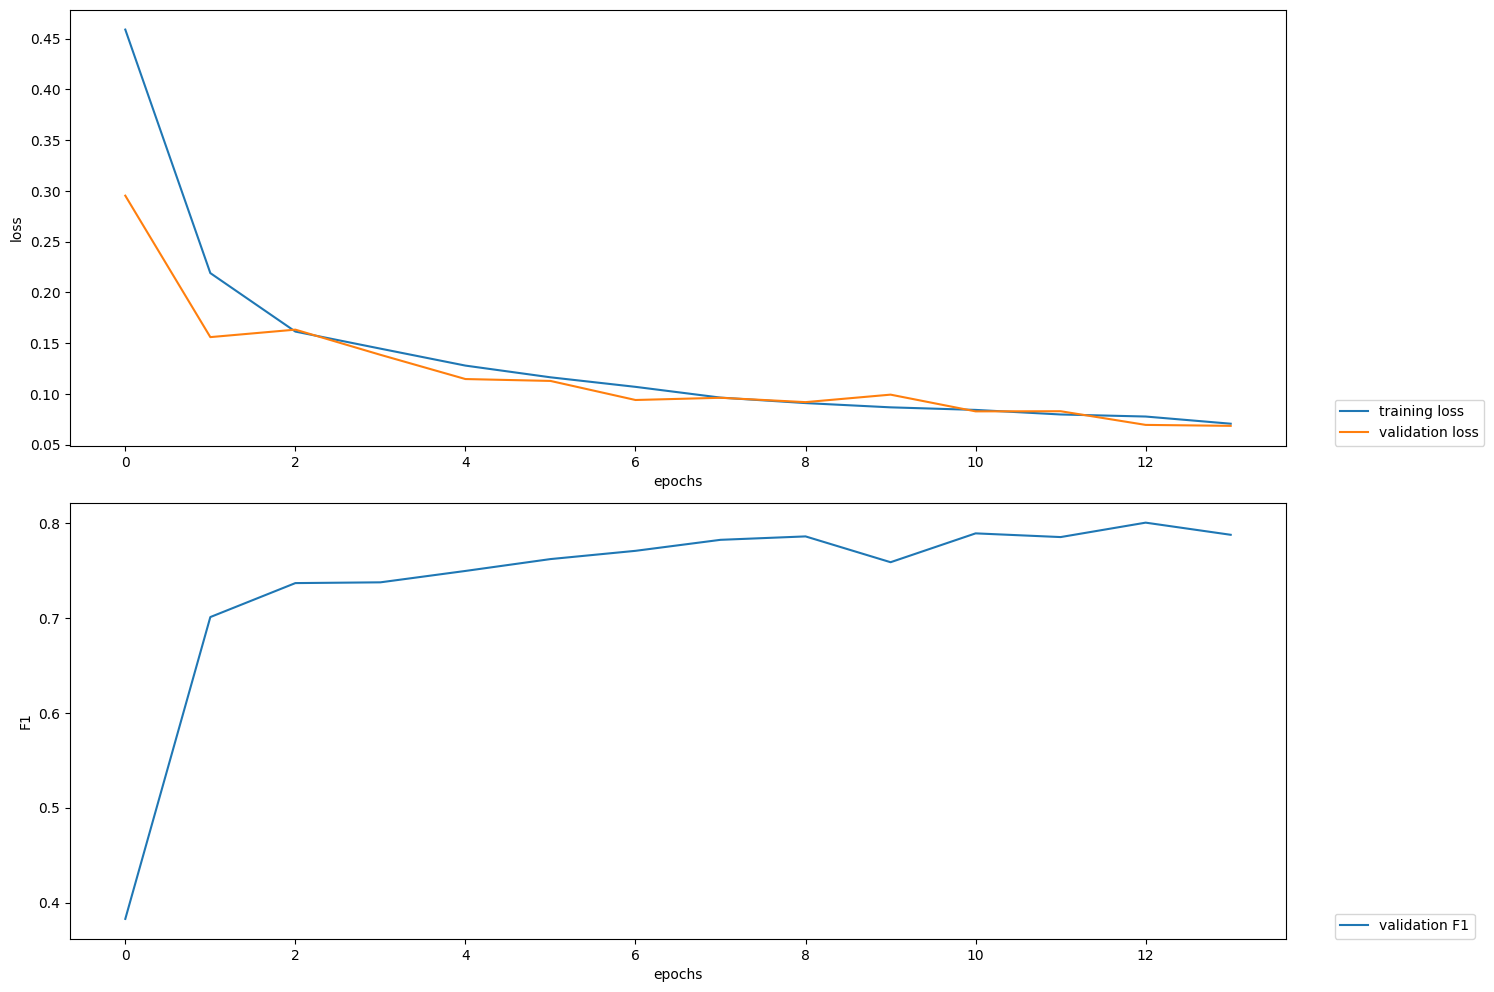

2023-09-18 12:56:07,387 Weights plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-FR/Flair-ECHR-train-FR/Flair-Hug-model-FR-all/weights.png


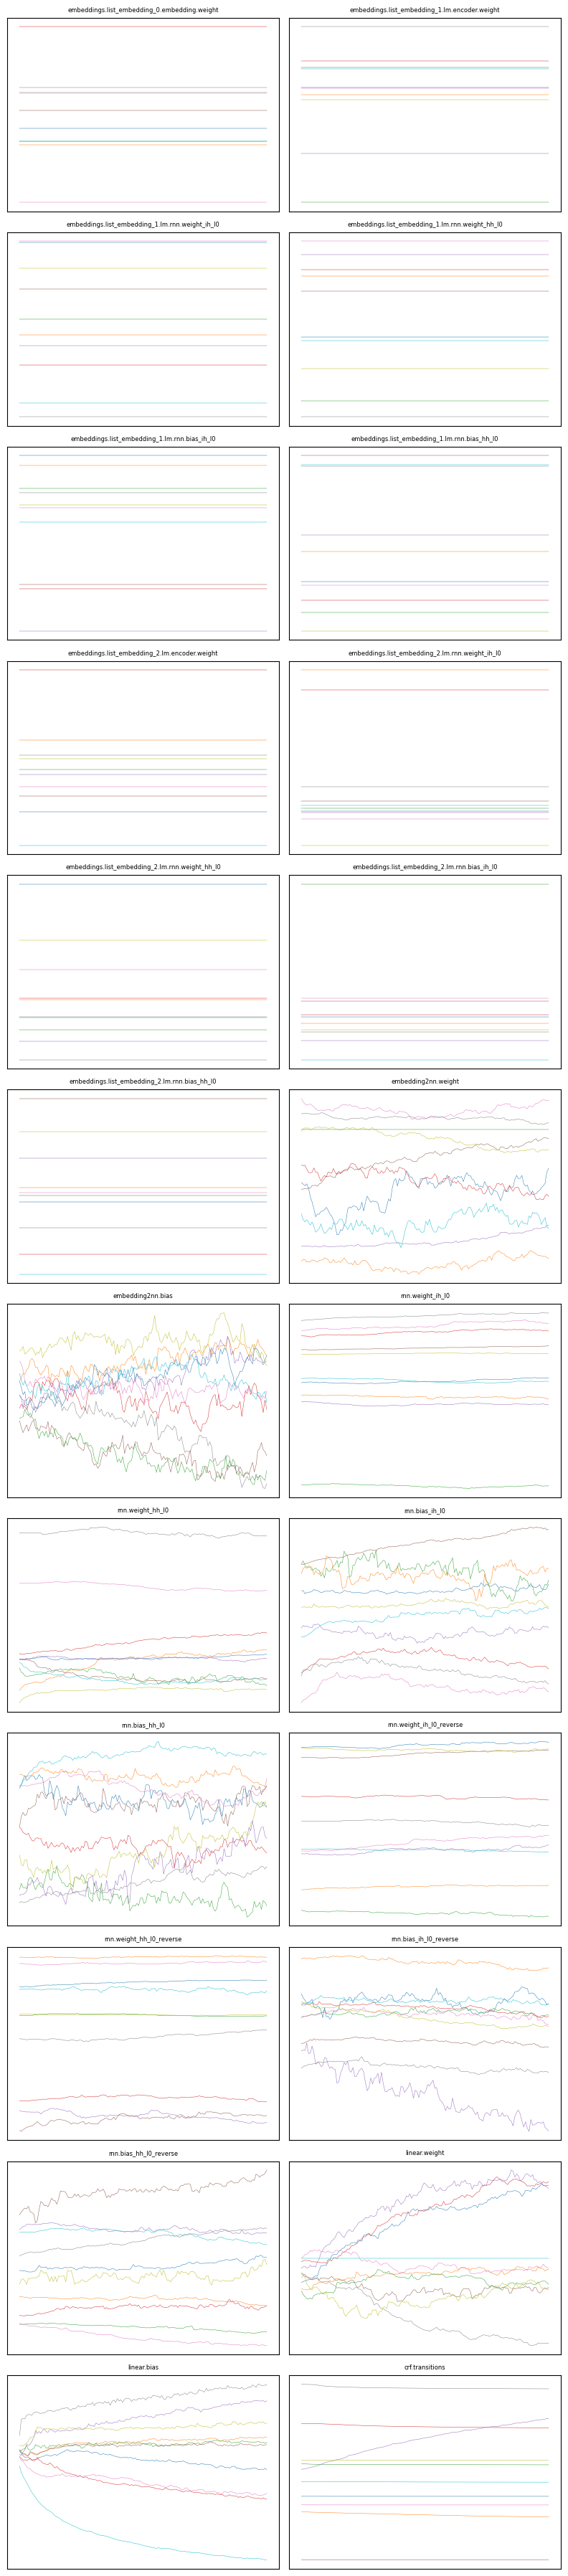

In [11]:
# plot training loss and weights
# Check documentation on training models with Flair

from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_training_curves('/content/drive/MyDrive/.../loss.tsv')
plotter.plot_weights('/content/drive/MyDrive/.../weights.txt')